<a href="https://colab.research.google.com/github/vishalkotwal/Sentiment-analysis-/blob/master/Movie_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import seaborn as sns

In [49]:
df = pd.read_excel("moviereviews.xlsx")

#Movie review dataset

In [50]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
6677,First off... I never considered myself an Uwe ...,negative
6678,STAR RATING: ***** Jodie Marsh **** Michelle M...,negative
6679,Christopher Nolan had his goals set on Followi...,positive
6680,"""Freddy's Dead"" did the smartest thing it coul...",negative


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6682 entries, 0 to 6681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     6682 non-null   object
 1   sentiment  6682 non-null   object
dtypes: object(2)
memory usage: 104.5+ KB


#MovieReview analysis

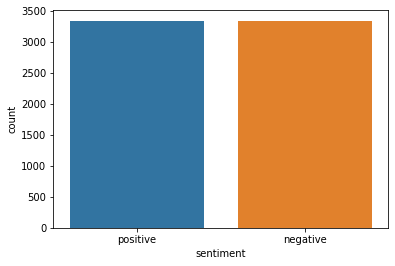

In [52]:
sns.countplot(x = "sentiment",data = df)

# Therefore The data is not biased

In [53]:
df['sentiment'].value_counts()

negative    3342
positive    3340
Name: sentiment, dtype: int64

# Get dumbies for whether the review is positive or negative

In [54]:
df['review'] = df['review'].fillna(' ')
x = df.iloc[:,0].values

#splitting tha dataset

In [55]:
df['binary'] = 1
df.loc[df['sentiment'] =="negative","binary"] =0
df.loc[df['sentiment']=="positive", 'binary'] = 1
y = df.iloc[:,2].values
y

array([1, 1, 1, ..., 1, 0, 0])

##splittng the dataset into train,test

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [57]:
x_train.shape

(4677,)

# Implementing sentiment analysis


In [58]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Applying TFIDF values on TF(train and test)

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
Multimodel = Pipeline([('tfidf',TfidfVectorizer(binary = True,max_df=0.611111111111111,norm = 'l2')),("Multinomial",MultinomialNB(alpha = 0.5,class_prior=None, fit_prior=True))])

In [79]:
#model = MultinomialNB(alpha = 0.058,fit_prior=True)
Multimodel.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.611111111111111,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('Multinomial',
                 MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True))],
         verbo

#predicting the values 

In [80]:
y_pred = Multimodel.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 1, 0])

# Evaluating model Accuracy

In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score

In [82]:
print(accuracy_score(y_pred,y_test)*100)
print(f1_score(y_test,y_pred))

85.18703241895261
0.8465116279069768


In [83]:
confusion_matrix(y_pred,y_test)

array([[889, 167],
       [130, 819]])

In [84]:
precision_score(y_test,y_pred)

0.863013698630137

In [71]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1050
           1       0.83      0.86      0.84       955

    accuracy                           0.85      2005
   macro avg       0.85      0.85      0.85      2005
weighted avg       0.85      0.85      0.85      2005



In [72]:
y_pred = Multimodel.predict(["Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."])
y_pred

array([0])

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
tfidf = TfidfVectorizer(max_df=0.611111111111111,norm = 'l2')
tfidf_x = tfidf.fit_transform(x)

In [75]:
from sklearn.model_selection import  GridSearchCV
parameters = {'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
Model2 = MultinomialNB()
grid = GridSearchCV(Model2,parameters,cv = 10 ,scoring="f1",iid= True)
grid.fit(tfidf_x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid=True, n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [76]:
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.837082,0.012012,{'alpha': 0.1}
1,0.841274,0.016394,{'alpha': 0.2}
2,0.842183,0.014775,{'alpha': 0.3}
3,0.841542,0.015175,{'alpha': 0.4}
4,0.842308,0.013142,{'alpha': 0.5}
5,0.841138,0.014419,{'alpha': 0.6}
6,0.838400,0.013780,{'alpha': 0.7}
7,0.837310,0.014326,{'alpha': 0.8}
8,0.836855,0.014007,{'alpha': 0.9}
9,0.834962,0.012716,{'alpha': 1.0}


In [85]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8423084411551236
{'alpha': 0.5}
MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)
